<a href="https://colab.research.google.com/github/AviratGupta/AviratGupta-geeksman-AI-project2-Avirat/blob/master/face_detection_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

folder of google drive.

[folder](https://drive.google.com/drive/folders/1tHB9BgDWbwg_ah04vfPshELJII_BzE3q?usp=sharing)

importing important libraries..

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")

In [2]:
!wget -O "export.pkl" "https://drive.google.com/uc?id=1ny6XSR4XJBO7im0s7F0TClGEWewcLZXY"

--2020-08-28 06:48:47--  https://drive.google.com/uc?id=1ny6XSR4XJBO7im0s7F0TClGEWewcLZXY
Resolving drive.google.com (drive.google.com)... 74.125.140.138, 74.125.140.101, 74.125.140.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.140.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘export.pkl’

export.pkl              [ <=>                ]   3.15K  --.-KB/s    in 0s      

2020-08-28 06:48:47 (31.0 MB/s) - ‘export.pkl’ saved [3226]



uploading kaggle.json file.

In [3]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


setting up environment.

In [4]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [5]:
!kaggle datasets download -d aviratgupta/face-recognition

100% 343M/343M [00:10<00:00, 45.0MB/s]



unzipping our dataset.

In [ ]:
!unzip "*.zip"

# prediction time..

Here our predictions start by creatingn a function predictor which open a test image and try to predict the image.

In [7]:
my_dir="/content/drive/My Drive/face-recognition"
Predict = load_learner(my_dir)
def predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=Predict.predict(test_img)
  return pred_class

create a folder named test in colab.then run below program.

combining images of both the folder(me and not me) into a test folder.

In [9]:
import os
import shutil

path_to_your_files = '/content/me'
copy_to_path = '/content/test'

files_list = sorted(os.listdir(path_to_your_files))
orders = range(1, len(files_list) , 4)

for order in orders:
    files = files_list[order] # getting 1 image after 3 images
    shutil.copyfile(os.path.join(path_to_your_files, files), os.path.join(copy_to_path, files)) 

In [10]:
path_to_your_file = '/content/not me'
copy_to_path = '/content/test'

files_list = sorted(os.listdir(path_to_your_file))
orders = range(1, len(files_list) , 4)

for order in orders:
    files = files_list[order] # getting 1 image after 3 images
    shutil.copyfile(os.path.join(path_to_your_file, files), os.path.join(copy_to_path, files)) 

gives us a predicted image and and tell us whether it is my face or not.

me


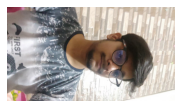

In [11]:
test_img = os.listdir("test")
index = 0
print(predictor("test/"+test_img[index]))
img = open_image("test/"+test_img[index])
img.show()

# creating video of all trained images in the folder.

parameters in opecv2 for editing.

img: your image

text: a string of text to print on image

org: bottom-left corner of the text string in the image (x,y)

font: font type

fontScale: font scale

color: text color (B,G,R)

thickness: text line thickness

lineType: line type (8)

In [12]:
import cv2
test_files = os.listdir("test")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img = cv2.imread("test/"+test_file)
  cv2.imwrite("sample.jpg",img)
  ans_text = predictor("sample.jpg")
  font = cv2.FONT_HERSHEY_TRIPLEX
  i += 1
  org = (0, 50) 
  fontScale = 1
  color = (80,128,40)
  thickness = 3
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [19]:
%cd "test_result"
!ffmpeg -framerate 2 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_result.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [20]:
!pip install -U kora
from kora.drive import upload_public

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.5.5)


In [21]:
url = upload_public('final_result.mp4')
url

'https://drive.google.com/uc?id=1P5TY6G9b7NeNqV9JjSeJy5le42t2FiYT'

we use general html code to display video.

In [22]:
from IPython.display import HTML
HTML(f"""<video src={url} width="500" height="500" controls/>""")